In [1]:
import torch

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

from world import World
from multiverse import vsm_utils

from matplotlib import pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot

In [2]:
world = World()
world.create()

521it [00:00, 3079.83it/s]


In [3]:
representations = world.vectors.embeddings

In [4]:
dists = pdist(representations, 'jaccard')

In [5]:
dists

array([0.93877551, 0.99300699, 0.92929293, ..., 0.99130435, 0.9375    ,
       0.96402878])

In [7]:
Z = hierarchy.linkage(dists, method='average')

In [8]:
rootnode, nodelist = hierarchy.to_tree(Z, rd=True)

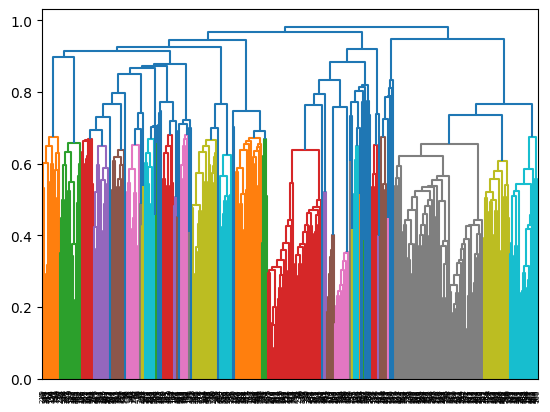

In [9]:
hierarchy.dendrogram(Z,
            orientation='top',
#             labels=range(0, 521),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [11]:
full = 1-vsm_utils.jaccard(world.vectors.embeddings, world.vectors.embeddings).numpy()

In [15]:
fig = ff.create_dendrogram(world.vectors.embeddings, labels=world.vectors.vocab, linkagefun=lambda x: hierarchy.linkage(world.vectors.embeddings, 'average', metric='jaccard'))

In [16]:
iplot(fig)

In [29]:
nodelist[521].left.id

319

In [30]:
world.vectors.vocab[319]

'orange'

In [34]:
nodelist[-1].dist

0.981730460670159

In [35]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters = 50, random_state = 1).fit(world.vectors.embeddings.numpy())

In [45]:
km

KMeans(n_clusters=50, random_state=1)

In [15]:
world.vectors.neighbor(
    world.vectors(['robin', 'penguin']).max(0).values.unsqueeze(0),
    k = 10,
    space = world.taxonomy['bird.n.01'].descendants(),
    nearest = False,
    sim_function=vsm_utils.jaccard
)

[[('cockerel', 0.5403225421905518),
  ('chicken', 0.5390625),
  ('ostrich', 0.5333333015441895),
  ('hummingbird', 0.5206611156463623),
  ('peacock', 0.5169491767883301),
  ('emu', 0.5135135054588318),
  ('hawk', 0.5081967115402222),
  ('eagle', 0.5081967115402222),
  ('falcon', 0.5),
  ('owl', 0.5)]]

In [79]:
(world.vectors(['mouse', 'rat']).sum(0).clip(0,1) == world.vectors(['mouse', 'rat']).max(0).values).sum()

tensor(3652)

In [76]:
torch.tensor([[0,1], [1,1]]).max(0).values

tensor([1, 1])

In [4]:
world.vectors.embeddings[[1,2,3]]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [6]:
world.vectors(['mouse', 'cat']).max(0).values.unsqueeze(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])